In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/crop-production-statistics-india/APY.csv')

In [3]:
df = df.rename(columns=lambda x: x.replace(' ', ''))
df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [4]:
df['State'] = df['State'].str.replace(' and ', ' & ')
state_replacements = {
    'Andaman & Nicobar Island': 'Andaman & Nicobar',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'THE DADRA AND NAGAR HAVELI': 'Dadra and Nagar Haveli and Daman and Diu',
    'Laddak': 'Ladakh',
    'CHANDIGARH' :'Chandigarh'
}
df['State'] = df['State'].replace(state_replacements)

In [5]:
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [6]:
df.dropna(subset=['Crop'], inplace=True)

In [7]:
(df.Production.isna().sum()/len(df))*100

1.4316864884587652

In [8]:
production_median = df['Production'].median()
df['Production'].fillna(production_median, inplace=True)

/tmp/ipykernel_17/4043336660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].fillna(production_median, inplace=True)


In [9]:
df.describe()

,Crop_Year,Area,Production,Yield
count,345327.000000,3.453270e+05,3.453270e+05,345327.000000
mean,2008.887680,1.167177e+04,9.447745e+05,79.425204
std,6.564326,4.584135e+04,2.137645e+07,916.690252
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,9.000000e+01,0.550000
50%,2009.000000,5.320000e+02,7.180000e+02,1.000000
75%,2015.000000,4.112000e+03,6.941000e+03,2.470000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df.columns

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield'],
      dtype='object')

In [12]:
df['State'] = encoder.fit_transform(df['State'])
df['District'] = encoder.fit_transform(df['District'])
df['Crop'] = encoder.fit_transform(df['Crop'])
df['Season'] = encoder.fit_transform(df['Season'])

In [13]:
df = df.drop(['Yield'], axis = 1)

In [14]:
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production
0,0,464,0,2007,1,2439.6,3415.0
1,0,464,0,2007,2,1626.4,2277.0
2,0,464,0,2008,0,4147.0,3060.0
3,0,464,0,2008,3,4147.0,2660.0
4,0,464,0,2009,0,4153.0,3120.0


In [15]:
corr_matrix = df.corr()

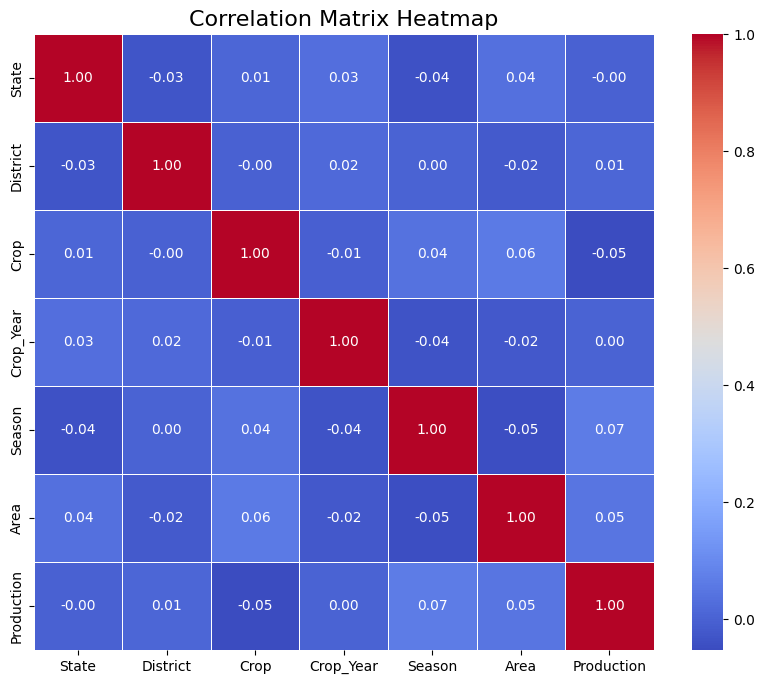

In [16]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train[['Crop_Year', 'Area']] = scaler.fit_transform(X_train[['Crop_Year', 'Area']])
X_test[['Crop_Year', 'Area']] = scaler.transform(X_test[['Crop_Year', 'Area']])

In [21]:
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))  
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

In [23]:
rf.fit(X_train, y_train_scaled)

/tmp/ipykernel_17/1925426633.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train_scaled)


RandomForestRegressor(n_jobs=-1)

In [24]:
y_pred_scaled = rf.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rf = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f"Random Forest MSE: {mse_rf}")

mae_rf = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f"Random Forest MAE: {mae_rf}")

r2_rf = r2_score(y_test_scaled, y_pred_scaled)
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MSE: 0.031023310072787625
Random Forest MAE: 0.006521207291920467
Random Forest R-squared: 0.9655846605787191


In [26]:
y_pred_real = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

y_test_real = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rf = mean_squared_error(y_test_real, y_pred_real)
print(f"Random Forest MSE: {mse_rf}")

mae_rf = mean_absolute_error(y_test_real, y_pred_real)
print(f"Random Forest MAE: {mae_rf}")

r2_rf = r2_score(y_test_real, y_pred_real)
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MSE: 14534268384281.896
Random Forest MAE: 141149.8842820532
Random Forest R-squared: 0.9655846605787191


In [28]:
X_test.head()

,State,District,Crop,Crop_Year,Season,Area
161022,18,333,23,-1.356414,2,-0.244633
18177,2,486,24,1.540844,1,-0.191605
42672,4,85,14,-0.136516,4,-0.245116
162519,18,575,24,0.625921,1,-0.016906
33546,3,219,40,-0.136516,5,0.762240


In [29]:
y_test.head()

161022        5.0
18177      4528.0
42672         9.0
162519    16622.0
33546     75333.0
Name: Production, dtype: float64

In [30]:
results_df = pd.DataFrame({
    'Actual': y_test_real.flatten(),
    'Predicted': y_pred_real.flatten()
})

In [31]:
print(results_df.head())

    Actual     Predicted
0      5.0     19.440000
1   4528.0   4458.720000
2      9.0     10.613127
3  16622.0  18435.580000
4  75333.0  86661.840000
